# A Linear Classifier with TensorFlow

This is a simple application of TensorFlow to. linear classifier of data in 2D grouped in two classes.

## Data generation

We first come up with some regular and nicely linearly separable synthetoc data.

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0,3],
                                                 cov=[[1, 0.5], [0.5, 1]],
                                                 size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3, 0],
                                                 cov=[[1, 0.5], [0.5, 1]],
                                                 size=num_samples_per_class)

In [4]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

## Generation of targets

Given the data generated, we now generate the corresponding class targets: 0 for the negative sample points and 1 for the positive ones.

In [5]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                     np.ones((num_samples_per_class, 1), dtype='float32')))

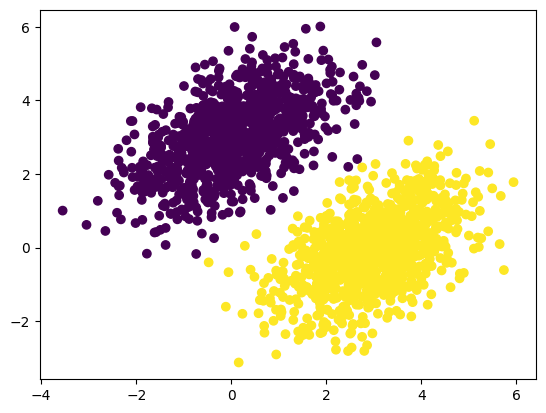

In [6]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

## Linear Classifier - Variables

A linear classifier is an affine transformation of the form prediction = W ̇input + b, trained to minimize the square of the difference between predictions and targets.

In [7]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

## Forward Pass
We define the model applying the forward pass.

In [8]:
def model(inputs):
  return tf.matmul(inputs, W) + b

We now define a mean square error loss function.

In [9]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

## Training of the model

We use batch training instead of mini-batch training and loop up the training for 40 cycles.

In [11]:
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

In [12]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss: .4f}")

Loss at step 0:  0.7291
Loss at step 1:  0.1010
Loss at step 2:  0.0868
Loss at step 3:  0.0803
Loss at step 4:  0.0751
Loss at step 5:  0.0705
Loss at step 6:  0.0663
Loss at step 7:  0.0625
Loss at step 8:  0.0591
Loss at step 9:  0.0560
Loss at step 10:  0.0531
Loss at step 11:  0.0505
Loss at step 12:  0.0482
Loss at step 13:  0.0460
Loss at step 14:  0.0441
Loss at step 15:  0.0423
Loss at step 16:  0.0407
Loss at step 17:  0.0392
Loss at step 18:  0.0379
Loss at step 19:  0.0367
Loss at step 20:  0.0356
Loss at step 21:  0.0346
Loss at step 22:  0.0337
Loss at step 23:  0.0329
Loss at step 24:  0.0321
Loss at step 25:  0.0315
Loss at step 26:  0.0308
Loss at step 27:  0.0303
Loss at step 28:  0.0298
Loss at step 29:  0.0293
Loss at step 30:  0.0289
Loss at step 31:  0.0285
Loss at step 32:  0.0281
Loss at step 33:  0.0278
Loss at step 34:  0.0275
Loss at step 35:  0.0273
Loss at step 36:  0.0270
Loss at step 37:  0.0268
Loss at step 38:  0.0266
Loss at step 39:  0.0264


We can see how after 40 cycles the mean loss converges towards 0.026. Let's plot how the linear model classifies the given training data points.

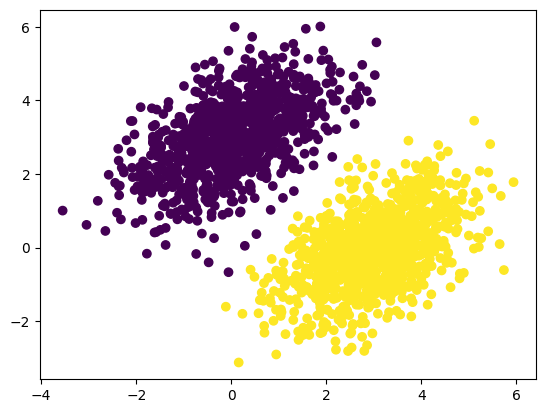

In [13]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()